# Joint Distributions and Covariance
- We now consider pairs and vectors of random variables. In general, in a probability spce, we amy define multiple random vairables, $X_{1},\cdots, X_{n}$, where we consider the vector or tuple, $\pmb{X} = (X_{1}, \cdots, X_{n})$, as a ***random vector.*** A key question deals with representing and evaluating probabilities of the form $\mathbb{P}(\pmb{X}\in B)$, where $B$ is some subset $\mathbb{R}^{n}$. Our focus here is on the case of a pair of random vairables $(X,Y)$, which are continuous and have a density function. The probability distribution of $(X,Y)$ is called a ***bivariate distribution***, and more generally the probability of $X$ is called a ***multivariate distribution***.

## The Joint PDF
- A function, $f_{\pmb{X}}: \mathbb{R}^{n} \to \mathbb{R}$, is said to be a ***Joint Probability Density Function (PDF)*** if for any input, $x_{1},\cdots,x_{n}$, it holds that $f_{\pmb{X}}(x_{1},x_{2},\cdots, x_{n})\ge 0$ and
$$
\int_{-\infty}^{\infty}\int_{-\infty}^{\infty}\cdots\int_{-\infty}^{\infty}f_{\pmb{X}}(x_{1}, x_{2}, \cdots, x_{n})dx_{1}dx_{2}\cdots dx_{n} = 1
$$
- Hence, if we consider now $B\subset \mathbb{R}^{n}$, then the probabilities of a random vector $X$, distributed with density $f_{\pmb{X}}$, can be evaluated by
$$
\mathbb{P}(\pmb{X}\in B) = \int_{B}f_{\pmb{X}}(\pmb{x})d\pmb{x}.
$$

### Example
- Let $\pmb{X} = (X,Y)$ and consider the joint density, simply denoted $f(\cdot, \cdot)$,
$$
f(x,y) = 
\begin{cases}
  \frac{9}{8}(4x + y)\sqrt{(1-x)(1-y)} & \quad	x\in[0,1], y\in[0,1],\\
  0, &\quad \text{otherwise.}
\end{cases}
$$
- Set $B = \{(x,y)\vert x<y\}$, then
$$
\mathbb{P}\bigg((x,y) \in B\bigg) = \int_{x=0}^{1}\int_{y=x}^{1}f(x,y)dydx = \frac{31}{80}=0.3875.
$$
- We can obtain the ***marginal densities*** of $X$ and $Y$, denoted $f_{X}(\cdot)$ and $f_{Y}(\cdot)$:
$$
f_{X}(x) = \int_{y=0}^{1}f(x,y)dy\quad \text{and}\quad f_{Y}(y) = \int_{x=0}^{1}f(x,y) dx \\
\Downarrow
\\
f_{X}(x) = \frac{3}{10}\sqrt{1-x}(1+10x)\quad \text{and}\quad f_{Y}(y) = \frac{3}{20}\sqrt{1-y}(8+5y).
$$
- In general, the random vairbles $X$ and $Y$ are said to be ***independent*** if $f(x,y) = f_{X}(x)f_{Y}(y)$. But in our current example, this is not the case. Furthermore, whenever we have two densities of scalar random variables, we may multiply them to make the joint distribution of the random vector composed of independent random varible. 
$$
\tilde{f}(x,y) = f_{X}(x)f_{Y}(y) = \frac{9}{200}\sqrt{(1-x)(1-y)}(1+10x)(8+5y)
$$
- Observe that $\tilde{f}(x,y)\ne f(x,y)$. Hence, while both bivariate distributions have the same marginal distribution, they are different bivariate distributions and hence describe different relationships between $X$ and $Y$.
- The ***conditional density*** of $X$ given $Y$. It is denoted by $f_{X\vert Y=y}(x)$ and describes the distribution of the random variable $X$, given the specific value $Y=y$.
$$
f_{X\vert Y=y}(x) = \frac{f(x,y)}{f_{Y}(y)} = \frac{f(x,y)}{\int_{x=0}^{1}f(x,y)dx}
$$


2-dimensional Riemann sum over density: 1.0063787264382458
2-dimensional Riemann sum to evaluate probability: 0.3932640388868346


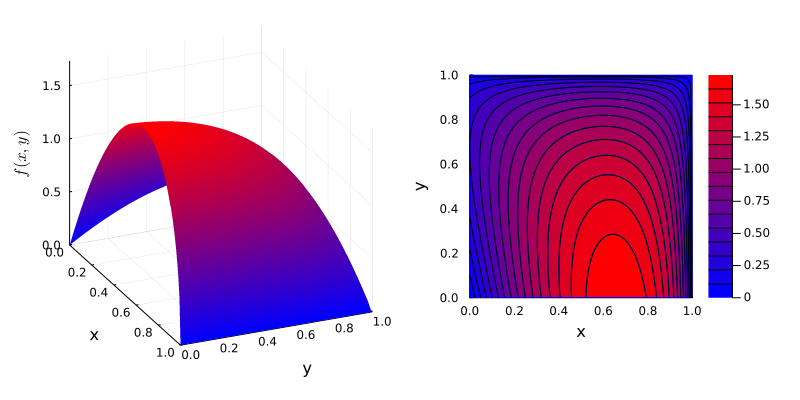

In [25]:
using Plots, LaTeXStrings, Measures;gr()

delta = 0.01
grid = 0:delta:1
f(x,y) = 9/8*(4x+y)*sqrt((1-x)*(1-y))
z = [f(x,y) for y in grid, x in grid]

densityIntegral = sum(z)*delta^2
println("2-dimensional Riemann sum over density: ",densityIntegral)

probB = sum([sum([f(x,y)*delta for y in x:delta:1])*delta for x in grid])
println("2-dimensional Riemann sum to evaluate probability: ", probB)

p1 = surface(grid, grid, z,
    c=cgrad([:blue, :red]), la=1, camera=(60,50),
    ylabel="y", zlabel=L"f(x,y)", legend=:none)
p2 = contourf(grid, grid, z,
    c=cgrad([:blue, :red]))
p3 = contour!(grid, grid, z,
    c=:black, xlims=(0,1), ylims=(0,1), ylabel="y", ratio=:equal)

plot(p1,p2, size=(800, 400), xlabel="x", margin=5mm)

## Covariance and Vectorized Moments
- Given two random variables, $X$ and $Y$, with respective means, $\mu_{X}$ and $\mu_{Y}$, the ***covariance*** is defined by
$$
{\rm Cov}(X,Y) = \mathbb{E}[(X-\mu_{X})(Y-\mu_{Y})] = \mathbb{E}[XY] - \mu_{X}\mu_{Y}
$$
- The covariance is a common measure of the relationship between the two random variables, where if ${\rm Cov}(X,Y)=0$, we say the random variable are ***unrelated***. Furthermore, if ${\rm Cov}(X,Y)\ne 0$, the sign of the covariance gives an indication of the direction of the relationship.
- The ***correlation coefficient*** is
$$
\rho_{XY} = \frac{\text{Cov}(X,Y)}{\sqrt{\text{Var}(X)\text{Var}(Y)}}
$$
- It is a normalized form of the covariance with $-1\le \rho_{XY}\le 1$. Values nearing $\pm 1$ indicate a very strong ***linear relationship*** between $X$ and $Y$, whereas values near or at $0$ indicate a lack of a linear relationship.
- Note that if $X$ and $Y$ are independent random variables, then $\text{Cov}(X,Y)=0$ and hence $\rho_{XY}=0$. However, the opposite case does not always hold, since, in general, $\rho_{XY}=0$ does not imply indepenence. Nevertheless as described below, for jointly normal random variables it does.
- Consider a random vector $\pmb{X}=(X_{1},\cdots,X_{n})$, taken as a column vector. It can be described by moments in an analogous manner to a scalar random variable. A key quantity is the ***mean vector***,
$$
\mu_{X}:= \big[\mathbb{E}[X_{1}], \mathbb{E}[X_{2}], \cdots, \mathbb{E}[X_{n}]\big]^{\top}
$$
- Furthermore, the ***covariance matrix*** is the matrix defined by the expectation of the random matrix given by $(\pmb{X}-\mu_{X})(\pmb{X}-\mu_{X})^{\top}$, and is expressed as
$$
\Sigma_{\pmb{X}}=\text{Cov}(\pmb{X})=\mathbb{E}[(\pmb{X}-\mu_{X})(\pmb{X}-\mu_{X})^{\top}]
$$
- The $i$, $j$-th element of $\Sigma_{\pmb{X}}$ is $\text{Cov}(X_{i},X_{j})$ and hence the diagonal elements are the variances.

## Linear Combinations and Transform
- The ***linear transformations*** applied to random vectors. For any collection of random variables,
$$
\mathbb{E}[X_{1}+\cdots+X_{n}] = \mathbb{E}[X_{1}]+\cdots+\mathbb{E}[X_{n}]
$$
- For ***uncorrelated*** random variables,
$$
\text{Var}(X_{1}+\cdots+X_{n}) = \text{Var}(X_{1}) +\cdots + \text{Var}(X_{n})
$$
- More generally, if we allows the random variables tobe correlated, then
$$
\text{Var}(X_{1}+\cdots+X_{n}) = \text{Var}(X_{1}) +\cdots + \text{Var}(X_{n}) + 2\sum_{i<j}\text{Cov}(X_{i},X_{j})
$$
- Note that the right-hand side of forluma above is the sum of the elements of the matrix $\Sigma_{\pmb{X}}$. This is a special case of a more general ***affine transformation***, where we take a random vector $\pmb{X}=(X_{1},\cdot, X_{n})$ with covariance matrix $\Sigma_{\pmb{X}}$, and an $m\times n $ matrix $A$ and $m$ vector $\pmb{b}$, we then set
$$
\pmb{Y} = A\pmb{X} +\pmb{b}
$$
- In this case, the new random vector $\pmb{Y}$ exhibits mean and covariance
$$
\mathbb{E}[\pmb{Y}] = A \mathbb{E}[\pmb{Y}]+\pmb{b}\quad \text{and}\quad \text{Cov}(\pmb{Y})=A\Sigma_{\pmb{X}}A^{\top}
$$

## The Cholesky Decomposition and Generating Random Vectors
- Suppose that you wish to create an $n$-dimensional random vector $\pmb{Y}$ with some specified mean vector $\mu_{\pmb{Y}}$ and covariance matrix $\Sigma_{\pmb{Y}}$. That is, $\mu_{\pmb{Y}}$ and $\Sigma_{\pmb{Y}}$ are known.
- If we are given a random vector $X$ with zero-mean and identity-covariance matrix $(\Sigma_{\pmb{X}}=I)$. And apply the ***affine transformation*** on $\pmb{X}$ with $\pmb{b} = \mu_{\pmb{Y}}$ and a matrix $A$ that satisfies
$$
\Sigma_{\pmb{Y}} = AA^{\top}
$$
- The question is now how to find a matrix $A$. For this the ***Cholesky decomposition*** comes as an aid and finds a matrix $A$.
- As an example assume we wish to generate a random vector $\pmb{Y}$ with
$$
\mu_{\pmb{Y}}=\left[
\begin{matrix}
  15\\
  20
\end{matrix}
\right] \quad \text{and} \quad
\Sigma_{\pmb{Y}} =
\left[
\begin{matrix}
  6 & 4 \\
  4 & 9
\end{matrix}
\right]
$$
- Solution by Julia


Mean1	Mean2	Var1	Var2	Cov
14.99	19.99	6.01	9.0	4.0
15.0	20.0	6.01	8.96	3.97
15.0	19.98	6.03	8.85	4.01


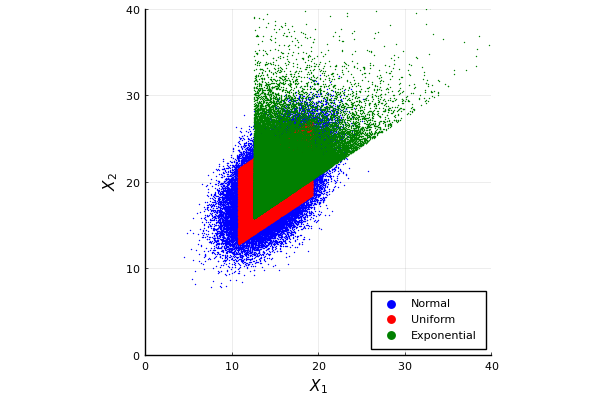

In [26]:
using Distributions, LinearAlgebra, LaTeXStrings, Random, Plots; pyplot()
Random.seed!(1)

N = 10^5

SigY = [6 4;
    4 9]
muY = [15;
    20]
A = cholesky(SigY).L

rngGens = [ ()->rand(Normal()),
            ()->rand(Uniform(-sqrt(3),sqrt(3))),
            ()->rand(Exponential())-1]

rv(rg) = A*[rg(), rg()] + muY

data = [[rv(r) for _ in 1:N] for r in rngGens]

stats(data) = begin
    data1, data2 = first.(data), last.(data)
    println(round(mean(data1), digits=2),"\t",round(mean(data2),digits=2), "\t",
    round(var(data1),digits=2),"\t", round(var(data2),digits=2), "\t",
    round(cov(data1, data2), digits=2))
end

println("Mean1\tMean2\tVar1\tVar2\tCov")
for d in data
    stats(d)
end

scatter(first.(data[1]), last.(data[1]), c=:blue, ms=1, msw=0, label="Normal")
scatter!(first.(data[2]), last.(data[2]), c=:red, ms=1, msw=0, label="Uniform")
scatter!(first.(data[3]), last.(data[3]), c=:green, ms=1, msw=0, label="Exponential",
    xlims=(0,40), ylims=(0,40), legend=:bottomright, ratio=:equal,
    xlabel=L"X_1", ylabel=L"X_2")

In [27]:
print(A)

[2.449489742783178 0.0; 1.6329931618554523 2.516611478423583]

In [28]:
[sqrt(6) 0; 4/sqrt(6) sqrt(9-16/6)]

2×2 Matrix{Float64}:
 2.44949  0.0
 1.63299  2.51661

## Bivariate Normal
- Similartly to the fact that a scalar (***univariate***) normal distribution is parameterized by the mean $\mu$ and variance $\sigma^{2}$, a multivariate normal distribution is parameterized by the mean vector $\mu_{\pmb{X}}$ and the covariance matrix $\Sigma_{\pmb{X}}$
- We begin first with the ***standard multivairate*** having $\mu_{\pmb{X}}=0$ and $\Sigma_{\pmb{X}}=I$. In this case, the PDF for the random vector $\pmb{X} = (X_{1},\cdots,X_{n})$ is
$$
f(x) = (2\pi)^{-n/2}e^{-\frac{1}{2}\pmb{x}^{\top}\pmb{x}}.
$$



In [ ]:
using HCubature

M = 4.5
maxD = 10

f(x) = (2*pi)^(-length(x)/2)*exp(-1/2*x'x)

for n in 1:maxD
    a = -M*ones(n)
    b = M*ones(n)
    I,e = hcubature(f, a, b, maxevals = 10^7)
    println("n = $(n), integral = $(I), error (estimate) = $(e)")   
end

n = 1, integral = 0.9999932046537506, error (estimate) = 4.365848932375016e-10
n = 2, integral = 0.9999864091389512, error (estimate) = 1.4879076430758683e-8
n = 3, integral = 0.9999796140804276, error (estimate) = 1.4899542982476792e-8
n = 4, integral = 0.9999728074508349, error (estimate) = 4.444736568188887e-7
n = 5, integral = 0.9999659361030472, error (estimate) = 2.3294669134911902e-5
n = 6, integral = 0.9999639124757703, error (estimate) = 0.00039379544626103144
n = 7, integral = 1.0001623151630616, error (estimate) = 0.00315066501633783
n = 8, integral = 1.007482734843358, error (estimate) = 0.02327574166459761
n = 9, integral = 1.2233043761463278, error (estimate) = 0.3731125349186621
n = 10, integral = 0.42866209316161147, error (estimate) = 0.2208976060366829


- In general, using an affine transformation, it can be shown that for arbitrary $\mu_{\pmb{X}}$ and $\Sigma_{\pmb{X}}$,
$$
f(\pmb{x}) = \vert \Sigma_{\pmb{X}}\vert^{-1/2}(2\pi)^{-n/2}e^{-\frac{1}{2}(\pmb{x}-\mu_{\pmb{X}})^{\top}\Sigma_{\pmb{X}}^{-1}(\pmb{x}-\mu_{\pmb{X}})}
$$
- In the case of $n=2$, this becomes the ***bivarate normal distribution*** with a density represented as
$$
f_{XY}(x,y; \sigma_{X}, \sigma_{Y}, \mu_{X}, \mu_{Y}, \rho) = \frac{1}{2\pi\sigma_{X}\sigma_{Y}\sqrt{1-\rho^{2}}}\\
\times \exp\bigg\{\frac{-1}{2(1-\rho^{2})}\bigg[\frac{(x-\mu_{X})^{2}}{\sigma^{2}_{X}} - \frac{\rho(x-\mu_{X})(y-\mu_{Y})}{\sigma_{X}\sigma_{Y}}+\frac{(y-\mu_{Y})^{2}}{\sigma^{2}_{Y}}\bigg]\bigg\}
$$
- Here the elements of the mean and covariance matrix is
$$
\mu_{\pmb{X}} = 
\left[
\begin{matrix}
  \mu_{X} \\
  \mu_{Y}
\end{matrix}
\right] \quad
\text{and}\quad
\Sigma_{\pmb{Y}} = 
\left[
\begin{matrix}
  \sigma^{2}_{X} & \sigma_{X}\sigma_{Y}\rho \\
  \sigma_{X}\sigma_{Y}\rho & \sigma^{2}_{Y}
\end{matrix}
\right]
$$

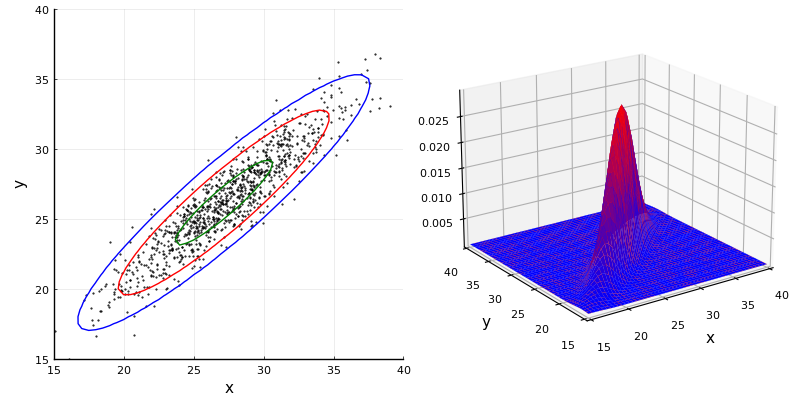

In [13]:
using Distributions, Plots; pyplot()

include("../data/mvParams.jl")
biNorm = MvNormal(meanVect, covMat)

N = 10^3
points = rand(MvNormal(meanVect, covMat), N)

support = 15:0.5:40
z = [ pdf(biNorm, [x,y]) for y in support, x in support]

p1 = scatter(points[1,:], points[2,:], ms=0.5, c=:black, legend=:none)
p1 = contour!(support, support, z,
    levels=[0.001, 0.005, 0.02], c=[:blue, :red, :green],
    xlims=(15,40), ylims=(15,40), ratio=:equal, legend=:none,
    xlabel="x", ylabel="y")
p2 = surface(support, support, z, lw=0.1, c=cgrad([:blue, :red]),
    legend=:none, xlabel="x", ylabel="y", camera=(-35,20))

plot(p1,p2, size=(800,400))